In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import itertools
from tqdm import tqdm_notebook as tqdm

In [3]:
# Locations in block units
_locations = \
      [(4, 4), # depot
       (2, 0), (8, 0), # locations to visit
       (0, 1), (1, 1),
       (5, 2), (7, 2),
       (3, 3), (6, 3),
       (5, 5), (8, 5),
       (1, 6), (2, 6),
       (3, 7), (6, 7),
       (0, 8), (7, 8)]

demands = [0, # depot
         1, 1, # row 0
         2, 4,
         2, 4,
         8, 8,
         1, 2,
         1, 2,
         4, 4,
         8, 8]

capacities = [15, 15, 15, 15]

time_windows = \
        [(0, 0),
         (75, 85), (75, 85), # 1, 2
         (60, 70), (45, 55), # 3, 4
         (0, 8), (50, 60), # 5, 6
         (0, 10), (10, 20), # 7, 8
         (0, 10), (75, 85), # 9, 10
         (85, 95), (5, 15), # 11, 12
         (15, 25), (10, 20), # 13, 14
         (45, 55), (30, 40)] # 15, 16



In [4]:
def weight(node1: [float,float], node2: [float,float]):
    return math.sqrt((node1[0]-node2[0])**2
              + (node1[1]-node2[1])**2)

def powerset(iterable, lb=1):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(lb, len(s)+1))

In [5]:
G = nx.Graph(instance="Google OR example")

for i in range(len(_locations)):
    G.add_node(i, location=_locations[i], demand=demands[i], time_window=time_windows[i], status=0)

for i in range(len(_locations)):
    for j in range(len(_locations)):
        if i >= j:
            continue
        G.add_edge(i, j,
                   weight=math.sqrt(
                       (_locations[i][0]-_locations[j][0])**2
                       + (_locations[i][1]-_locations[j][1])**2))

In [6]:
viable_routes = []
total_capacity = sum(capacities)
total_demand = sum(demands)
lower_bound = total_demand % max(capacities) or max(capacities)

for route in powerset(range(1, len(G.nodes))):
    demand = 0
    viable = True
    for i in route:
        if not viable:
            continue
        demand += demands[i]
        if demand > max(capacities):
            viable = False
            break
    else:
        if demand >= lower_bound:
            viable_routes += [[route, demand]]
    

In [ ]:
best_route = [[], 99999999999]
limit = 1000
for solution in tqdm(powerset(viable_routes)):
    attended_demand = sum([x[1] for x in solution])
    coverage = set(i for x in solution for i in x[0])
    # limit -= 1
    # if not limit:
    #     break
    # print (coverage)
    if attended_demand == total_demand <= total_capacity and len(coverage) == len(G.nodes) - 1:
        total_weight = sum([G.get_edge_data(x[0][i], x[0][i+1])["weight"] for x in solution for i in range(len(x[0])-1)])
        if total_weight < best_route[1]:
            best_route = [solution, total_weight]
best_route

In [19]:
%%timeit
nx.algorithms.tree.minimum_spanning_tree(G, algorithm="kruskal", weight="weight").edges

675 µs ± 41.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
%%timeit
nx.algorithms.tree.minimum_spanning_tree(G, algorithm="prim", weight="weight").edges

551 µs ± 36.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


/home/ramon/.local/share/virtualenvs/otimgraf-s98R5NnN/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


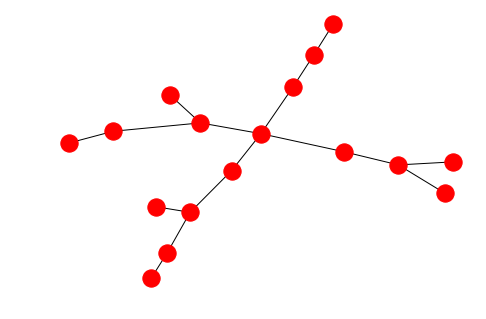

In [16]:
MST = nx.algorithms.tree.minimum_spanning_tree(G, algorithm="prim", weight="weight")
nx.draw(MST)
#for node in MST.nodes:
    # print(node, MST.degree[node])

In [14]:
for i, j in G.edges:
    print(i, j, G.get_edge_data(i, j)["weight"])

0 1 4.47213595499958
0 2 5.656854249492381
0 3 5.0
0 4 4.242640687119285
0 5 2.23606797749979
0 6 3.605551275463989
0 7 1.4142135623730951
0 8 2.23606797749979
0 9 1.4142135623730951
0 10 4.123105625617661
0 11 3.605551275463989
0 12 2.8284271247461903
0 13 3.1622776601683795
0 14 3.605551275463989
0 15 5.656854249492381
0 16 5.0
1 2 6.0
1 3 2.23606797749979
1 4 1.4142135623730951
1 5 3.605551275463989
1 6 5.385164807134504
1 7 3.1622776601683795
1 8 5.0
1 9 5.830951894845301
1 10 7.810249675906654
1 11 6.082762530298219
1 12 6.0
1 13 7.0710678118654755
1 14 8.06225774829855
1 15 8.246211251235321
1 16 9.433981132056603
2 3 8.06225774829855
2 4 7.0710678118654755
2 5 3.605551275463989
2 6 2.23606797749979
2 7 5.830951894845301
2 8 3.605551275463989
2 9 5.830951894845301
2 10 5.0
2 11 9.219544457292887
2 12 8.48528137423857
2 13 8.602325267042627
2 14 7.280109889280518
2 15 11.313708498984761
2 16 8.06225774829855
3 4 1.0
3 5 5.0990195135927845
3 6 7.0710678118654755
3 7 3.6055512754639